In [1]:
import numpy as np
import argparse
import os, time

from pykin.utils import plot_utils as p_utils

from pytamp.benchmark import Rearrange1
from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement
from pytamp.utils import point_cloud_utils as pc_utils
from pykin.utils.transform_utils import get_inverse_homogeneous



def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=100, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=10, help="Max depth")
#     parser.add_argument("--seed", metavar="i", type=int, default=7, help="A random seed")
    parser.add_argument("--seed", metavar="i", type=int, default=144, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('doosan', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-cedbf7d2-d037-4f53-9a0d-6a295b2248c9.json


*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can1',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('milk0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('cereal0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=ben_cube0, pos=[0.30355822 0.00852862 0.84779998]),
                           Object(name=can0, pos=[0.39698326 0.00357495 0.83501831]),
                           Object(name=can1, pos=[0.76977701 0.03858527 0.83512874]),
                           Object(name=milk0, pos=[ 0.48530145 -0.34550815  0.83236691]),
                           Object(name=cereal0, pos=[0.4

In [2]:
np.__version__

'1.19.5'

In [3]:
c = 2.5
idx = 0
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=args.debug_mode,
    )
mcts.only_optimize_1 = False

In [4]:
start_time = time.time()
for i in range(budgets):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {rearrangement1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 1 ===========
[Action] Rearr cereal0
placed another place not goal
[Reward] S(0) -> A(8) -> S'(9) Reward : -1
[Action] Rearr can1
placed another place not goal
[Reward] S(9) -> A(13) -> S'(17) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(17) -> A(20) -> S'(23) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(23) -> A(25) -> S'(31) Reward : 4.0
[Action] Rearr can0
placed another place not goal
[Reward] S(31) -> A(32) -> S'(40) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(40) -> A(44) -> S'(47) Reward : -1
[Action] Rearr can1
Good Action
[Reward] S(47) -> A(52) -> S'(55) Reward : 2.5
[Action] Rearr cereal0
placed another place not goal
[Reward] S(55) -> A(60) -> S'(62) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(62) -> A(65) -> S'(69) Reward : 2.0
[Action] Rearr milk0
Good Action
[Reward] S(69) -> A(73) -> S'(76) Reward 

Good Action
[Reward] S(361) -> A(366) -> S'(368) Reward : 6.667
[Action] Rearr cereal0
placed another place not goal
[Reward] S(368) -> A(373) -> S'(375) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(375) -> A(378) -> S'(381) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(381) -> A(383) -> S'(388) Reward : 3.333
[Action] Rearr cereal0
Good Action
[Reward] S(388) -> A(393) -> S'(394) Reward : 2.857
[Action] Rearr can0
placed another place not goal
[Reward] S(394) -> A(396) -> S'(400) Reward : -1
[Action] Rearr can1
Bad Action
[Reward] S(400) -> A(402) -> S'(405) Reward : -2.5
[Action] Rearr ben_cube0
Bad Action
[Reward] S(405) -> A(406) -> S'(411) Reward : -2.222
[Action] Rearr can1
Good Action
[Reward] S(411) -> A(415) -> S'(417) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  11.594925880432129 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 7 ===========
[Action] R

[Action] Rearr can0
Good Action
[Reward] S(679) -> A(681) -> S'(687) Reward : 5.0
[Action] Rearr milk0
placed another place not goal
[Reward] S(687) -> A(692) -> S'(695) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(695) -> A(696) -> S'(702) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(702) -> A(709) -> S'(710) Reward : 2.857
[Action] Rearr milk0
Good Action
[Reward] S(710) -> A(717) -> S'(718) Reward : 2.5
[Action] Rearr ben_cube0
Good Action
[Reward] S(718) -> A(720) -> S'(725) Reward : 2.222
[Action] Rearr can1
placed another place not goal
[Reward] S(725) -> A(727) -> S'(731) Reward : -1
[Action] Rearr cereal0
Bad Action
[Reward] S(731) -> A(735) -> S'(736) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  20.570342540740967 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 12 ===========
[Action] Rearr milk0
placed another place not goal
[Reward] S(0) -> A(6) ->

[Action] Rearr cereal0
placed another place not goal
[Reward] S(992) -> A(997) -> S'(999) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(999) -> A(1002) -> S'(1006) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(1006) -> A(1010) -> S'(1014) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(1014) -> A(1016) -> S'(1021) Reward : 2.0
[Action] Rearr cereal0
Good Action
[Reward] S(1021) -> A(1027) -> S'(1028) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  29.06055474281311 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 17 ===========
[Action] Rearr cereal0
placed another place not goal
[Reward] S(0) -> A(8) -> S'(9) Reward : -1
[Action] Rearr can1
Good Action
[Reward] S(9) -> A(14) -> S'(1029) Reward : 6.667
[Action] Rearr can0
placed another place not goal
[Reward] S(1029) -> A(1032) -> S'(1036) Reward : -1
[Action] Rearr can1
Bad Action
[Reward]

[Action] Rearr can1
placed another place not goal
[Reward] S(1293) -> A(1297) -> S'(1301) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(1301) -> A(1302) -> S'(1308) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(1308) -> A(1314) -> S'(1316) Reward : -1
[Action] Rearr can1
Good Action
[Reward] S(1316) -> A(1321) -> S'(1323) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  37.408684968948364 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 22 ===========
[Action] Rearr can0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(220) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(220) -> A(221) -> S'(1324) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(1324) -> A(1326) -> S'(1332) Reward : 5.0
[Action] Rearr can1
placed another place not goal
[Reward] S(1332) -> A(1335) -> S'(1339) Reward : -1
[Action] Rearr b

[Action] Rearr milk0
Bad Action
[Reward] S(1594) -> A(1598) -> S'(1601) Reward : -2.5
[Action] Rearr ben_cube0
Good Action
[Reward] S(1601) -> A(1603) -> S'(1609) Reward : 2.0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(1609) -> A(1615) -> S'(1617) Reward : -1
Exceeded the maximum depth!!
########### Running time :  45.573516845703125 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 27 ===========
[Action] Rearr can1
Good Action
[Reward] S(0) -> A(5) -> S'(361) Reward : 10.0
[Action] Rearr can0
placed another place not goal
[Reward] S(361) -> A(364) -> S'(1618) Reward : -1
[Action] Rearr can1
Bad Action
[Reward] S(1618) -> A(1621) -> S'(1624) Reward : -6.667
[Action] Rearr milk0
Good Action
[Reward] S(1624) -> A(1629) -> S'(1631) Reward : 4.0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(1631) -> A(1637) -> S'(1639) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(1639) -> A(1640) -

[Action] Rearr can1
Good Action
[Reward] S(1894) -> A(1899) -> S'(1902) Reward : 2.0
[Action] Rearr ben_cube0
Bad Action
[Reward] S(1902) -> A(1903) -> S'(1909) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  54.376057147979736 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 32 ===========
[Action] Rearr cereal0
placed another place not goal
[Reward] S(0) -> A(8) -> S'(9) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(9) -> A(15) -> S'(1910) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(1910) -> A(1913) -> S'(1918) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(1918) -> A(1926) -> S'(1927) Reward : 4.0
[Action] Rearr can1
placed another place not goal
[Reward] S(1927) -> A(1931) -> S'(1935) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(1935) -> A(1937) -> S'(1941) Reward : -1
[Action] Rearr cereal0
Bad Action
[Reward

[Action] Rearr cereal0
placed another place not goal
[Reward] S(2212) -> A(2219) -> S'(2220) Reward : -1
Exceeded the maximum depth!!
########### Running time :  62.75967359542847 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 37 ===========
[Action] Rearr can0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(220) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(220) -> A(221) -> S'(1324) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(1324) -> A(1325) -> S'(2221) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(2221) -> A(2227) -> S'(2229) Reward : 4.0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(2229) -> A(2235) -> S'(2237) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(2237) -> A(2240) -> S'(2245) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(2245) -> A(2251) -> S'(2253) Reward : -1


[Action] Rearr ben_cube0
Bad Action
[Reward] S(2477) -> A(2478) -> S'(2484) Reward : -2.222
[Action] Rearr can1
Bad Action
[Reward] S(2484) -> A(2487) -> S'(2492) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  70.54448771476746 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 42 ===========
[Action] Rearr cereal0
placed another place not goal
[Reward] S(0) -> A(8) -> S'(9) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(9) -> A(10) -> S'(679) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(679) -> A(680) -> S'(2493) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(2493) -> A(2499) -> S'(2501) Reward : 4.0
[Action] Rearr can0
Good Action
[Reward] S(2501) -> A(2505) -> S'(2510) Reward : 3.333
[Action] Rearr ben_cube0
Good Action
[Reward] S(2510) -> A(2512) -> S'(2518) Reward : 2.857
[Action] Rearr cereal0
Good Action
[Reward] S(2518) -> A(2524) -> 

Good Action
[Reward] S(2729) -> A(2735) -> S'(2738) Reward : 3.333
[Action] Rearr can0
Good Action
[Reward] S(2738) -> A(2742) -> S'(2747) Reward : 2.857
[Action] Rearr can1
placed another place not goal
[Reward] S(2747) -> A(2750) -> S'(2755) Reward : -1
[Action] Rearr can0
Bad Action
[Reward] S(2755) -> A(2758) -> S'(2761) Reward : -2.5
[Action] Rearr cereal0
placed another place not goal
[Reward] S(2761) -> A(2767) -> S'(2769) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(2769) -> A(2771) -> S'(2776) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  77.70607113838196 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 48 ===========
[Action] Rearr ben_cube0
Good Action
[Reward] S(0) -> A(2) -> S'(153) Reward : 10.0
[Action] Rearr milk0
placed another place not goal
[Reward] S(153) -> A(158) -> S'(2652) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(2652) -> A(2653) -> S'(2777) Reward

[Action] Rearr can1
placed another place not goal
[Reward] S(3002) -> A(3004) -> S'(3010) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(3010) -> A(3014) -> S'(3017) Reward : 2.5
[Action] Rearr cereal0
Good Action
[Reward] S(3017) -> A(3024) -> S'(3025) Reward : 2.222
[Action] Rearr ben_cube0
Bad Action
[Reward] S(3025) -> A(3026) -> S'(3032) Reward : -2.222
[Action] Rearr can1
Good Action
[Reward] S(3032) -> A(3036) -> S'(3039) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  85.0641770362854 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 53 ===========
[Action] Rearr cereal0
placed another place not goal
[Reward] S(0) -> A(8) -> S'(9) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(9) -> A(10) -> S'(679) Reward : -1
[Action] Rearr can1
placed another place not goal
[Reward] S(679) -> A(682) -> S'(3040) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(3040) ->

[Action] Rearr can1
Good Action
[Reward] S(3295) -> A(3299) -> S'(3302) Reward : 2.222
[Action] Rearr can0
Good Action
[Reward] S(3302) -> A(3306) -> S'(3309) Reward : 2.0
[Action] Rearr milk0
placed another place not goal
[Reward] S(3309) -> A(3313) -> S'(3315) Reward : -1
Exceeded the maximum depth!!
########### Running time :  93.10150122642517 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 58 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(1) -> S'(77) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(77) -> A(82) -> S'(3316) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(3316) -> A(3318) -> S'(3324) Reward : 5.0
[Action] Rearr can1
Good Action
[Reward] S(3324) -> A(3328) -> S'(3333) Reward : 4.0
[Action] Rearr ben_cube0
Bad Action
[Reward] S(3333) -> A(3334) -> S'(3341) Reward : -4.0
[Action] Rearr can0
placed another place not goal
[Reward] S(3341) 

[Action] Rearr cereal0
placed another place not goal
[Reward] S(3584) -> A(3589) -> S'(3590) Reward : -1
[Action] Rearr can0
Bad Action
[Reward] S(3590) -> A(3592) -> S'(3595) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  101.33787488937378 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 63 ===========
[Action] Rearr ben_cube0
Good Action
[Reward] S(0) -> A(2) -> S'(153) Reward : 10.0
[Action] Rearr milk0
placed another place not goal
[Reward] S(153) -> A(158) -> S'(2652) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(2652) -> A(2654) -> S'(3596) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(3596) -> A(3603) -> S'(3604) Reward : 4.0
[Action] Rearr can1
placed another place not goal
[Reward] S(3604) -> A(3608) -> S'(3612) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(3612) -> A(3614) -> S'(3619) Reward : -1
[Action] Rearr milk0
Good Action
[R

Good Action
[Reward] S(3842) -> A(3846) -> S'(3849) Reward : 2.0
[Action] Rearr can0
Bad Action
[Reward] S(3849) -> A(3851) -> S'(3855) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  108.28072738647461 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 68 ===========
[Action] Rearr can1
placed another place not goal
[Reward] S(0) -> A(4) -> S'(294) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(294) -> A(298) -> S'(1146) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(1146) -> A(1148) -> S'(3856) Reward : 5.0
[Action] Rearr milk0
Good Action
[Reward] S(3856) -> A(3862) -> S'(3865) Reward : 4.0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(3865) -> A(3871) -> S'(3873) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(3873) -> A(3876) -> S'(3880) Reward : 2.857
[Action] Rearr cereal0
placed another place not goal
[Reward] S(3880) -> A(3885) -> S'(388

[Action] Rearr can1
Good Action
[Reward] S(4111) -> A(4115) -> S'(4119) Reward : 4.0
[Action] Rearr milk0
placed another place not goal
[Reward] S(4119) -> A(4123) -> S'(4126) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(4126) -> A(4128) -> S'(4134) Reward : 2.857
[Action] Rearr can0
Good Action
[Reward] S(4134) -> A(4136) -> S'(4142) Reward : 2.5
[Action] Rearr cereal0
Good Action
[Reward] S(4142) -> A(4147) -> S'(4148) Reward : 2.222
[Action] Rearr milk0
placed another place not goal
[Reward] S(4148) -> A(4152) -> S'(4154) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(4154) -> A(4155) -> S'(4159) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  117.47740244865417 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 74 ===========
[Action] Rearr milk0
placed another place not goal
[Reward] S(0) -> A(6) -> S'(418) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S

[Action] Rearr cereal0
placed another place not goal
[Reward] S(4381) -> A(4388) -> S'(4389) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(4389) -> A(4390) -> S'(4398) Reward : -1
[Action] Rearr can1
Good Action
[Reward] S(4398) -> A(4402) -> S'(4406) Reward : 2.5
[Action] Rearr cereal0
placed another place not goal
[Reward] S(4406) -> A(4413) -> S'(4414) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(4414) -> A(4417) -> S'(4420) Reward : 2.0
[Action] Rearr milk0
placed another place not goal
[Reward] S(4420) -> A(4423) -> S'(4426) Reward : -1
Exceeded the maximum depth!!
########### Running time :  124.25242304801941 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 79 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(1) -> S'(77) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(77) -> A(84) -> S'(3481) Reward : -1
[Action] Rearr

Good Action
[Reward] S(4651) -> A(4656) -> S'(4658) Reward : 4.0
[Action] Rearr can0
Good Action
[Reward] S(4658) -> A(4661) -> S'(4666) Reward : 3.333
[Action] Rearr can1
placed another place not goal
[Reward] S(4666) -> A(4668) -> S'(4673) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(4673) -> A(4677) -> S'(4679) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(4679) -> A(4680) -> S'(4684) Reward : -2.5
[Action] Rearr can0
Bad Action
[Reward] S(4684) -> A(4685) -> S'(4691) Reward : -2.222
[Action] Rearr can1
placed another place not goal
[Reward] S(4691) -> A(4694) -> S'(4699) Reward : -1
Exceeded the maximum depth!!
########### Running time :  132.2374973297119 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 84 ===========
[Action] Rearr ben_cube0
Good Action
[Reward] S(0) -> A(2) -> S'(153) Reward : 10.0
[Action] Rearr can0
placed another place not goal
[Reward] S(153) -> A(154) -> S'(8

[Action] Rearr can0
Bad Action
[Reward] S(4926) -> A(4929) -> S'(4932) Reward : -4.0
[Action] Rearr milk0
Good Action
[Reward] S(4932) -> A(4938) -> S'(4940) Reward : 2.857
[Action] Rearr cereal0
Good Action
[Reward] S(4940) -> A(4948) -> S'(4949) Reward : 2.5
[Action] Rearr can1
placed another place not goal
[Reward] S(4949) -> A(4954) -> S'(4957) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(4957) -> A(4960) -> S'(4964) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(4964) -> A(4966) -> S'(4970) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  138.91376399993896 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 89 ===========
[Action] Rearr can1
Good Action
[Reward] S(0) -> A(5) -> S'(361) Reward : 10.0
[Action] Rearr milk0
placed another place not goal
[Reward] S(361) -> A(365) -> S'(1797) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(1

Good Action
[Reward] S(5191) -> A(5196) -> S'(5199) Reward : 3.333
[Action] Rearr can0
placed another place not goal
[Reward] S(5199) -> A(5201) -> S'(5206) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(5206) -> A(5207) -> S'(5212) Reward : -2.857
[Action] Rearr milk0
Good Action
[Reward] S(5212) -> A(5217) -> S'(5219) Reward : 2.222
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(5219) -> A(5220) -> S'(5225) Reward : -1
[Action] Rearr can1
Bad Action
[Reward] S(5225) -> A(5228) -> S'(5231) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  147.07002019882202 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 94 ===========
[Action] Rearr ben_cube0
Good Action
[Reward] S(0) -> A(2) -> S'(153) Reward : 10.0
[Action] Rearr milk0
Good Action
[Reward] S(153) -> A(159) -> S'(2679) Reward : 6.667
[Action] Rearr can0
Good Action
[Reward] S(2679) -> A(2682) -> S'(5232) Reward : 5.0
[Action]

[Action] Rearr can1
placed another place not goal
[Reward] S(5442) -> A(5445) -> S'(5448) Reward : -1
[Action] Rearr can0
Bad Action
[Reward] S(5448) -> A(5450) -> S'(5453) Reward : -2.5
[Action] Rearr milk0
Bad Action
[Reward] S(5453) -> A(5457) -> S'(5458) Reward : -2.222
[Action] Rearr cereal0
Bad Action
[Reward] S(5458) -> A(5463) -> S'(5464) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  153.75310802459717 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 99 ===========
[Action] Rearr cereal0
placed another place not goal
[Reward] S(0) -> A(8) -> S'(9) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(9) -> A(10) -> S'(679) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(679) -> A(684) -> S'(5465) Reward : -1
[Action] Rearr can1
placed another place not goal
[Reward] S(5465) -> A(5470) -> S'(5474) Reward : -1
[Action] Rearr can0
Good Action
[Reward] 

In [5]:
max_level_1_value = mcts.get_max_value_level_1()
max_level_1_value

mcts.history_level_1_dict

########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
    mcts.render_rearr("_", max_value_nodes)

Result 3 :  [0, 2, 153, 159, 2679, 2684, 2687, 2690, 2693, 2696, 2700, 2703, 2706, 2711, 2712]
state num : 15


In [6]:
state_list = [i for _, i in enumerate(max_value_nodes) if not _ % 2]
action_list = [i for _, i in enumerate(max_value_nodes) if _ % 2]

state_list, action_list

for i in range(len(max_value_nodes)//2):
    print("current state : ", max_value_nodes[2*i])
    print("action : ", max_value_nodes[2*i + 1])
    print("next state : ", max_value_nodes[2*(i+1)])
    
    print("manipulate object", mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])
    current_state_pc, current_count = pc_utils.get_obj_point_clouds(
                                rearrangement1.init_scene,
                                mcts.tree.nodes[max_value_nodes[2*i]]['state'],
                                mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
                                )
    next_state_pc, next_count = pc_utils.get_obj_point_clouds(
                                rearrangement1.init_scene,
                                mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],
                                mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
                                )
    
    print()
    
    if i>6:
        break
    

current state :  0
action :  2
next state :  153
manipulate object ben_cube0

current state :  153
action :  159
next state :  2679
manipulate object milk0

current state :  2679
action :  2684
next state :  2687
manipulate object can1

current state :  2687
action :  2690
next state :  2693
manipulate object milk0

current state :  2693
action :  2696
next state :  2700
manipulate object can0

current state :  2700
action :  2703
next state :  2706
manipulate object milk0

current state :  2706
action :  2711
next state :  2712
manipulate object cereal0



In [7]:
combined_pc = pc_utils.get_combined_point_cloud(mcts.tree.nodes[max_value_nodes[2*i]]['state'],
                                        mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],
                                        mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'],
                                        current_state_pc,
                                        next_state_pc,
                                        next_count
                                       )
mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']

'cereal0'

5000
cereal0


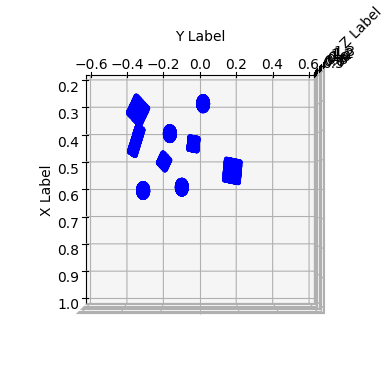

In [8]:
##### %matplotlib inline
import trimesh
from trimesh.util import concatenate

table_point_cloud =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)

# # obj_point_clouds = rearrangement1.get_obj_point_clouds(mcts.tree.nodes[1936]['state'])
# point_clouds = rearrangement1.get_obj_point_clouds(mcts.tree.nodes[311]['state'])

# point_clouds = np.vstack((point_clouds, table_point_cloud))
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(len(next_state_pc))
print(mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])
# matplotlib으로 point cloud 시각화하기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined_pc[:, 0], combined_pc[:, 1], combined_pc[:, 2], c='b', marker='.')

ax.set_xlim(.2,1.0)
ax.set_ylim(-.6,0.6)
ax.set_zlim(0.5,1.3)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(elev=90, azim=0)

plt.show()

#################### 
# 포인트 클라우드를 렌더링
colors = np.random.randint(0, 255, (1, 3), dtype=np.uint8)  # RGB colors (0-255)

all_pc = np.vstack([combined_pc, table_point_cloud])

pc_full = trimesh.points.PointCloud(all_pc,  colors=colors)
scene = trimesh.Scene(pc_full)
# Set the camera viewpoint

# Set point size and color
# scene.set_vertex_colors([0, 255, 0, 255])  # Set point color to green
scene.point_size = 5.0  # Increase point size to make them more visible

# Show the scene
scene.show()

In [9]:
all_pc

array([[0.4997251 , 0.18639036, 0.85433929],
       [0.56570068, 0.14737478, 0.88529998],
       [0.52753058, 0.21084907, 0.85824213],
       ...,
       [0.65873773, 0.01265283, 0.80829998],
       [0.47593797, 0.39562568, 0.80829998],
       [0.89650452, 0.29332033, 0.80829998]])

In [9]:
w_T_cam = np.array([[ 6.12323400e-17, -7.07106781e-01,  7.07106781e-01, 7.20660179e-01],
                   [ 1.00000000e+00,  4.32978028e-17, -4.32978028e-17, 6.34369494e-01],
                   [-0.00000000e+00,  7.07106781e-01,  7.07106781e-01, 1.82596015e+00],
                   [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, 1.00000000e+00]])

w_T_cam = w_T_cam.dot(
            trimesh.transformations.euler_matrix(np.pi, 0, 0)
        )

cam_T_w = get_inverse_homogeneous(w_T_cam)

In [10]:
ones_arr = np.full((len(all_pc), 1), 1)


In [11]:
w_pc = np.hstack((all_pc, ones_arr))

In [12]:
cam_pc =  np.dot(cam_T_w, w_pc.T).T

In [13]:
np.mean(cam_pc[:,0])

-0.7577330989218314

# Contact GraspNet

In [14]:
import os
import sys
import argparse
import numpy as np
import time
import glob
import cv2

import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath('/home/juju/contact_graspnet/contact_graspnet/inference.py')))
sys.path.append(os.path.join(BASE_DIR))
sys.path.append(os.path.join('/home/juju/contact_graspnet/contact_graspnet'))

import config_utils
from data import regularize_pc_point_count, depth2pc, load_available_input_data

from contact_graspnet import contact_graspnet

from contact_grasp_estimator import GraspEstimator
from visualization_utils import visualize_grasps, show_image

2023-07-04 18:54:44.849953: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-07-04 18:54:46.509839: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-07-04 18:54:46.555990: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-04 18:54:46.556141: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 Ti Laptop GPU computeCapability: 8.6
coreClock: 1.485GHz coreCount: 20 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 178.84GiB/s
2023-07-04 18:54:46.556191: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-07-04 18:54:46.598831: I tensorflow/str

/home/juju/contact_graspnet/pointnet2/tf_ops/sampling


In [15]:
parser = argparse.ArgumentParser()
parser.add_argument('--ckpt_dir', default='checkpoints/scene_test_2048_bs3_hor_sigma_001', help='Log dir [default: checkpoints/scene_test_2048_bs3_hor_sigma_001]')
parser.add_argument('--np_path', default='test_data/7.npy', help='Input data: npz/npy file with keys either "depth" & camera matrix "K" or just point cloud "pc" in meters. Optionally, a 2D "segmap"')
parser.add_argument('--png_path', default='', help='Input data: depth map png in meters')
parser.add_argument('--K', default=None, help='Flat Camera Matrix, pass as "[fx, 0, cx, 0, fy, cy, 0, 0 ,1]"')
parser.add_argument('--z_range', default=[0.2,1.8], help='Z value threshold to crop the input point cloud')
parser.add_argument('--local_regions', action='store_true', default=False, help='Crop 3D local regions around given segments.')
parser.add_argument('--filter_grasps', action='store_true', default=False,  help='Filter grasp contacts according to segmap.')
parser.add_argument('--skip_border_objects', action='store_true', default=False,  help='When extracting local_regions, ignore segments at depth map boundary.')
parser.add_argument('--forward_passes', type=int, default=1,  help='Run multiple parallel forward passes to mesh_utils more potential contact points.')
parser.add_argument('--segmap_id', type=int, default=0,  help='Only return grasps of the given object id')
parser.add_argument('--arg_configs', nargs="*", type=str, default=[], help='overwrite config parameters')

FLAGS = parser.parse_args(args=[])

In [16]:
global_config = config_utils.load_config(FLAGS.ckpt_dir, batch_size=FLAGS.forward_passes, arg_configs=FLAGS.arg_configs)

/home/juju/contact_graspnet/contact_graspnet/config_utils.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  global_config = yaml.load(f)


In [17]:
global_config

{'DATA': {'scene_contacts_path': 'acronym/scene_contacts',
  'gripper_width': 0.08,
  'input_normals': False,
  'use_uniform_quaternions': False,
  'view_sphere': {'elevation': [30, 150], 'distance_range': [0.9, 1.3]},
  'train_on_scenes': True,
  'labels': {'to_gpu': False,
   'bin_weights': [0.16652107,
    0.21488856,
    0.37031708,
    0.55618503,
    0.75124664,
    0.93943357,
    1.07824539,
    1.19423112,
    1.55731375,
    3.17161779],
   'filter_z': True,
   'k': 1,
   'max_radius': 0.005,
   'num_neg_contacts': 0,
   'num_pos_contacts': 8000,
   'offset_bins': [0,
    0.00794435329,
    0.0158887021,
    0.0238330509,
    0.0317773996,
    0.0397217484,
    0.0476660972,
    0.055610446,
    0.0635547948,
    0.0714991435,
    0.08],
   'z_val': -0.1},
  'pc_augm': {'occlusion_nclusters': 0,
   'occlusion_dropout_rate': 0.0,
   'sigma': 0.0,
   'clip': 0.005},
  'depth_augm': {'sigma': 0.001, 'clip': 0.005, 'gaussian_kernel': 0},
  'raw_num_points': 20000,
  'ndataset_poi

In [18]:
## Config를 받아서 GraspEstimatorr Class를 받아옴. 
grasp_estimator = GraspEstimator(global_config)


<module 'contact_graspnet.contact_graspnet' from '/home/juju/contact_graspnet/contact_graspnet/contact_graspnet.py'>


In [19]:
grasp_estimator.build_network()

--- Get model
Instructions for updating:
Colocations handled automatically by placer.


/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:307: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  warnings.warn(
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


{'pointclouds_pl': <tf.Tensor 'Placeholder:0' shape=(1, 20000, 3) dtype=float32>,
 'cam_poses_pl': <tf.Tensor 'Placeholder_2:0' shape=(1, 4, 4) dtype=float32>,
 'scene_idx_pl': <tf.Tensor 'Placeholder_1:0' shape=() dtype=int32>,
 'is_training_pl': <tf.Tensor 'Placeholder_3:0' shape=() dtype=bool>,
 'grasp_dir_pred': <tf.Tensor 'l2_normalize:0' shape=(1, 2048, 3) dtype=float32>,
 'binary_seg_head': <tf.Tensor 'fc2_seg/BiasAdd:0' shape=(1, 2048, 1) dtype=float32>,
 'binary_seg_pred': <tf.Tensor 'Sigmoid:0' shape=(1, 2048, 1) dtype=float32>,
 'grasp_offset_head': <tf.Tensor 'fc2_off/BiasAdd:0' shape=(1, 2048, 10) dtype=float32>,
 'grasp_offset_pred': <tf.Tensor 'Sigmoid_1:0' shape=(1, 2048, 10) dtype=float32>,
 'approach_dir_pred': <tf.Tensor 'l2_normalize_1:0' shape=(1, 2048, 3) dtype=float32>,
 'pred_points': <tf.Tensor 'layer1/GatherPoint:0' shape=(1, 2048, 3) dtype=float32>,
 'offset_pred_idcs_pc': <tf.Tensor 'ArgMax_1:0' shape=(1, 2048) dtype=int64>,
 'offset_bin_pred_vals': <tf.Tens

In [20]:
# Add ops to save and restore all the variables.
saver = tf.train.Saver(save_relative_paths=True)

# Create a session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.allow_soft_placement = True
sess = tf.Session(config=config)

2023-07-04 18:55:02.626288: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-04 18:55:02.627097: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-04 18:55:02.627234: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 Ti Laptop GPU computeCapability: 8.6
coreClock: 1.485GHz coreCount: 20 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 178.84GiB/s
2023-07-04 18:55:02.627319: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negati

In [21]:
checkpoint_dir = '/home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/'

# Load weights
grasp_estimator.load_weights(sess, saver, checkpoint_dir, mode='test')

('loading ', '/home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-54054')
INFO:tensorflow:Restoring parameters from /home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-54054


2023-07-04 18:55:06.515904: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3194065000 Hz


In [63]:
os.makedirs('results', exist_ok=True)

## Don't need Test Data 

# p = "/home/juju/contact_graspnet/test_data/0.npy"
# K=FLAGS.K

# print('Loading ', p)

# pc_segments = {}
# segmap, rgb, depth, cam_K, pc_full, pc_colors = load_available_input_data(p, K=K)


In [64]:
# z_range = [0.2,1.8]

# all_pc, pc_segments, pc_colors = grasp_estimator.extract_point_clouds(depth, cam_K, segmap=segmap, rgb=rgb,
#                                                                         skip_border_objects=False, z_range=z_range)


# pc_full = trimesh.points.PointCloud(all_pc,  colors=colors)
# scene = trimesh.Scene(pc_full)
# # Set the camera viewpoint

# # Set point size and color
# # scene.set_vertex_colors([0, 255, 0, 255])  # Set point color to green
# scene.point_size = 5.0  # Increase point size to make them more visible

# # Show the scene
# scene.show()

In [22]:
all_pc = cam_pc[:,:3]

In [23]:
pred_grasps_cam, scores, contact_pts, gripper_openings = {}, {}, {}, {}


In [24]:
pred_grasps_cam[-1], scores[-1], contact_pts[-1], gripper_openings[-1] = grasp_estimator.predict_grasps(sess, all_pc, convert_cam_coords=True, forward_passes=FLAGS.forward_passes)


2023-07-04 18:55:12.029910: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-07-04 18:55:14.062822: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-07-04 18:55:19.170404: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-07-04 18:55:27.123543: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-07-04 18:55:28.648516: W tensorflow/core/common_runtime/bfc_allocator.cc:337] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact.

In [25]:
pred_grasps_cam

{-1: array([[[ 0.60361576,  0.78379095,  0.14601253, -0.8224922 ],
         [-0.34952506,  0.09554715,  0.93204236,  0.36240068],
         [ 0.71657526, -0.61363053,  0.33162838,  0.71977884],
         [ 0.        ,  0.        ,  0.        ,  1.        ]],
 
        [[ 0.75042737, -0.6587108 , -0.05439531, -0.940166  ],
         [ 0.48786062,  0.49649978,  0.7179693 ,  0.3049875 ],
         [-0.4459269 , -0.5653211 ,  0.69394606,  0.7743637 ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]],
 
        [[-0.54357004,  0.83403665,  0.09441692, -0.63800466],
         [-0.32154605, -0.31081605,  0.8944281 ,  0.27964503],
         [ 0.77533203,  0.4558249 ,  0.4371315 ,  0.9230551 ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]],
 
        ...,
 
        [[-0.91392595,  0.38642457,  0.12415852, -0.97762436],
         [-0.07393175, -0.45927414,  0.88521254,  0.30648434],
         [ 0.3990907 ,  0.7998395 ,  0.44831163,  0.7858565 ],
         [ 0.        ,  0. 

In [27]:
visualize_grasps(all_pc, pred_grasps_cam, scores, plot_opencv_cam=True, pc_colors=None)


Visualizing...takes time


In [36]:
np.mean(pc_full[:,2])

0.8506203882748812